In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

In [146]:
insurance_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/insurance.csv')

In [147]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
insurance_dataset.shape

(1338, 7)

In [149]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [150]:
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [151]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-152-f6ee58a4ae91>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


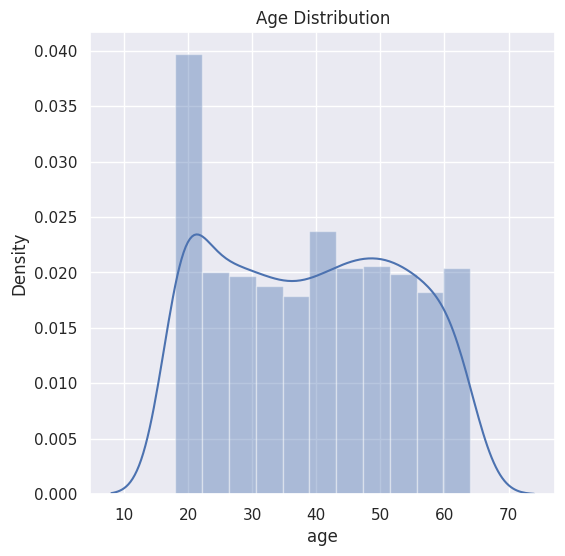

In [152]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

<ipython-input-153-d236e8a396db>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


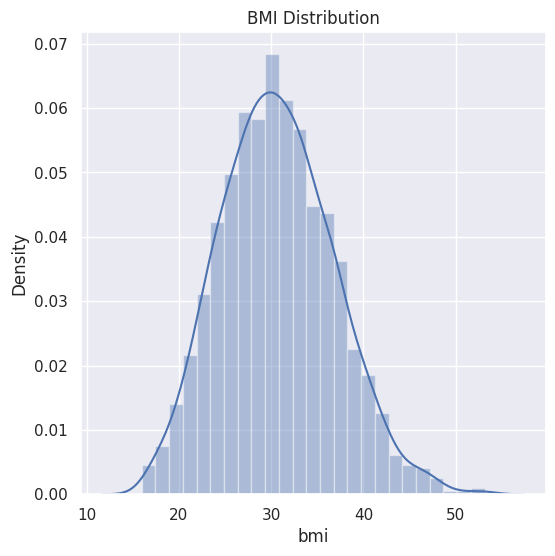

In [153]:
# BMI distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

<ipython-input-154-e300c5efb6ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=insurance_dataset, palette="viridis")


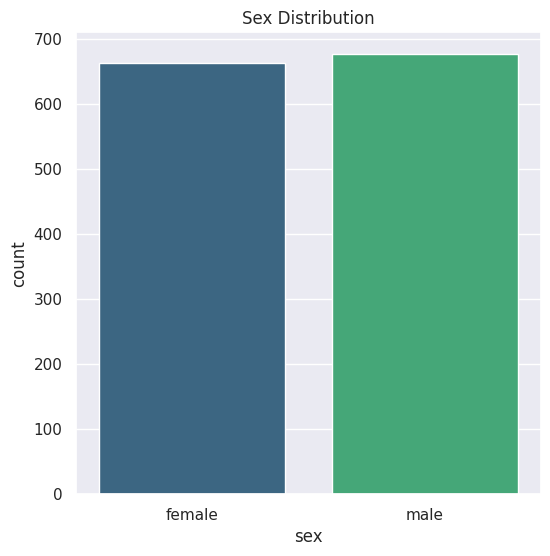

In [154]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset, palette="viridis")
plt.title('Sex Distribution')
plt.show()

In [155]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-156-6113e9f7d0d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=insurance_dataset, palette="viridis")


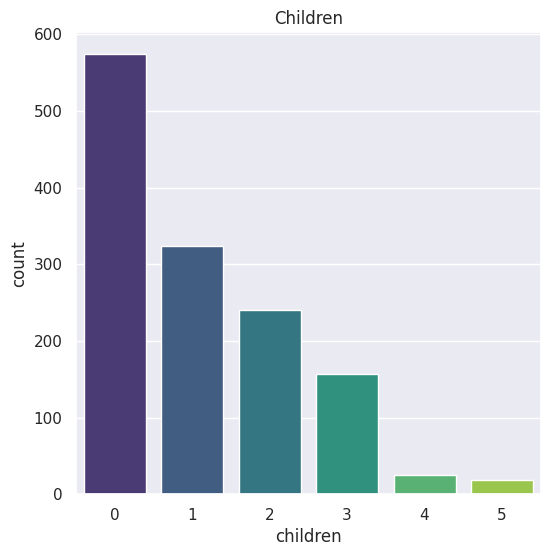

In [156]:
# Childern column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset, palette="viridis")
plt.title('Children')
plt.show()

In [157]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<ipython-input-158-198d466b6d52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=insurance_dataset, palette="viridis")


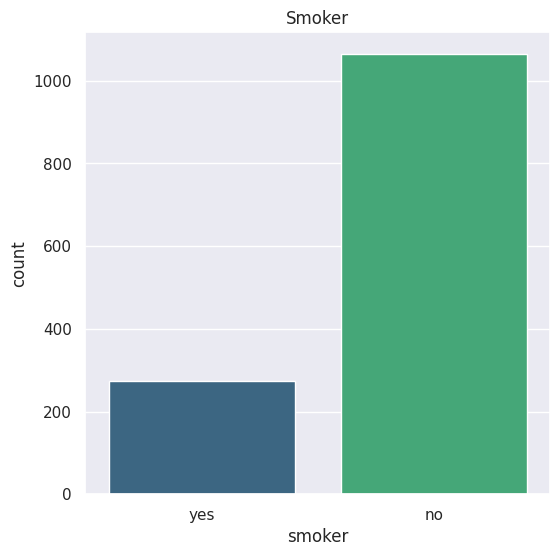

In [158]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset, palette="viridis")
plt.title('Smoker')
plt.show()

In [159]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


<ipython-input-160-befcbf169d95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=insurance_dataset, palette="viridis")


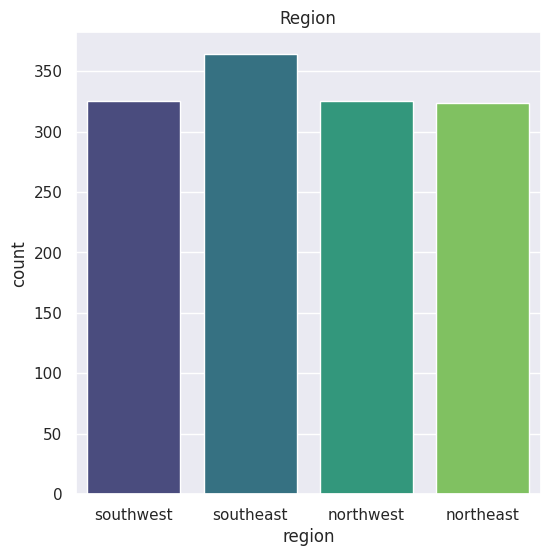

In [160]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset, palette="viridis")
plt.title('Region')
plt.show()

In [161]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-162-12e469a5480d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


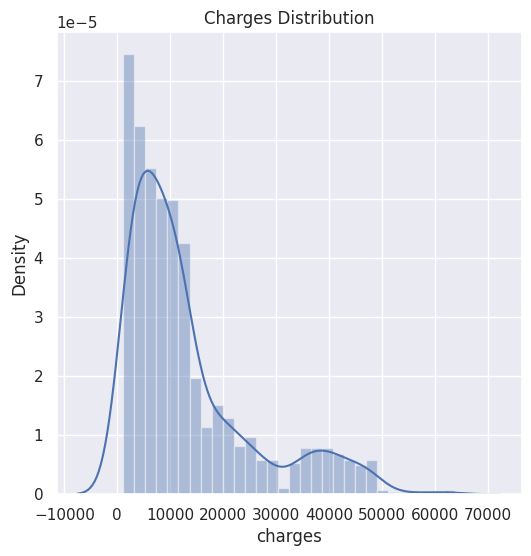

In [162]:
# dictribution of charges column
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [163]:
# Splitting data into features and target
x = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [164]:
# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region']),  # One-hot encoding for categorical columns
        ('num', StandardScaler(), ['age', 'bmi', 'children'])  # Scaling numerical columns
    ]
)

In [165]:
# Using Pipeline for preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])


In [166]:
# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)


In [167]:
# Fitting the pipeline
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model', RandomForestRegressor())])

In [168]:
# Model evaluation on training data
training_data_prediction = pipeline.predict(x_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Square value on Training Data: ', r2_train)

R Square value on Training Data:  0.9747538568195308


In [169]:
# Model evaluation on testing data
testing_data_prediction = pipeline.predict(x_test)
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('R Square value on Testing Data: ', r2_test)

R Square value on Testing Data:  0.8933939193462532


In [170]:
# Saving the pipeline using pickle
with open('insurance_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Model saved as 'insurance_model.pkl'")

Model saved as 'insurance_model.pkl'
